# Project: Investigate a Dataset (No-Show Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
#### Overview
##### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
#### Notes
##### ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
##### ● ‘Neighborhood’ indicates the location of the hospital.
##### ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
##### ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
####  Q1: What is the percentage of patients who couldn't show up for their scheduled appointment?
#### Q2: Does The Brasilian welfare program (Bolsa Familia) makes difference in patients attendence?
#### Q3: Does Age affects prevent patients from showing up for their appointment?
#### Q4: Does the location of hospital increase chances of missing appointment for patients?
#### Q5: Does patients Show up for their appointment when they carry more than one disease?
#### Q6: Does recieving SMS helped more patients attend in time for their appointment?
#### Q7: Does the period between Scheduled day and Appointment day affect patients show up for their Appointment?

#### This template created on my local machine with many versions updated.

In [1]:
# import needed libraries and modules for analysis 
# to make this investigation clear and readable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
#### Pandas library is awesome for fast view of our data set. So in the next few lines we will view helpful summary informations about our data set, which will help us in cleaning and exploring our data to reach satisfying results.

In [2]:
# load data set into dataframe using pandas
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# print out the first few rows of dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### We can see dataframe in tabular shape. Many details are shown for each row.

In [4]:
# print summary information of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### we got here more details, it's obvious that data set have 110527 entries which detailed in 14 field.
#### No Null observations.
#### All columns data types are shown but there is some data types needs to change like ScheduledDay & AppointmentDay.
#### Some columns names are wrong, and need to rewrite correctly.

In [5]:
# use pandas describe function to view summary statistics for some column of data set or all columns 
# here it will be usefull only with Age column
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### Summary statistics helped us get insights easily, like here we can see that the minimum age is negative value and that make no sense, so we will fix that later.

### Data Cleaning 
#### Cleaning Data is important part, best results depends on how good we cleaned our data set.
#### Next we will go step by step in this carefully.

In [6]:
# we told before there is no null values but more check is necessary
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### It's clear 100 percent there is no null values in our data frame.

In [7]:
# Negative values of Age make no sense, so i will replace this values
df[df['Age'] < 0]
# after run previous line it's only one entry so we can drop it, but here i will change it's age value to +1 
# considering it's just wrong entry sign for value
df.loc[df['Age'] < 0, 'Age'] = 1

In [8]:
# check for duplicates rows in data set 
df.duplicated().sum()

0

#### Founded no duplicate rows in our data set, after we changed age negative value to positive.

In [9]:
# Renaming names of columns which edited wrong
# As mentioned above in 4th note about No-show column, we will rename it to be consistent with rest of data
df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension','No-show':'Show_UP'}, inplace=True)

#### Renamed some columns to make data set more consistent.

In [10]:
# as mentioned in 4th note i will replace Show_UP values with 0 and 1 
# to make data set more consistent
df.loc[df['Show_UP'] == 'Yes', 'Show_UP'] = 0
df.loc[df['Show_UP'] == 'No', 'Show_UP'] = 1

#### Replacing values of show up column makes data frame more consistent, and help in calculate easier in analysis.

In [11]:
# change data type of ScheduledDay & AppointmentDay to date time format 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### Changing data type format for columns which have days to date time format.

In [12]:
# count unique values for Patient id and appointment id
df.PatientId.nunique(), df.AppointmentID.nunique()

(62299, 110527)

In [13]:
# as we found that all AppointmentID are unique, and PatientId are not unique,
# I will drop PatientID column, cause it is not useful in this analysis, and
# set AppointmentID as index
df.drop(['PatientId'], axis=1, inplace=True)
df.set_index('AppointmentID', inplace=True)

#### We checked for unique values in both columns contain id and found that patient id not unique and not useful, so it's dropped.
#### but Appointment id is unique and better used for indexing data set.

<a id='eda'></a>
## Exploratory Data Analysis

#### The basic question in our investigation which rest of questions built on is:
#### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Research Question 1 : What is the percentage of patients who couldn't show up for their scheduled appointment?

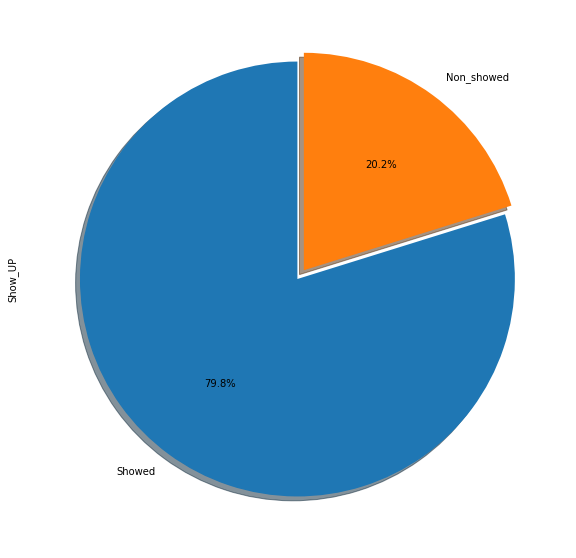

In [14]:
# Draw Pie chart to represent the percentage of patients who didn't show up for thier appointment
labels_show = ['Showed', 'Non_showed']
df.Show_UP.value_counts().plot(kind='pie', labels=labels_show, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, .05), figsize=(10, 10));

#### As we can see there is about 20 % of patients didn't show up for their appointment.

### Research Question 2 : Does The Brasilian welfare program (Bolsa Familia) makes difference in patients attendence?

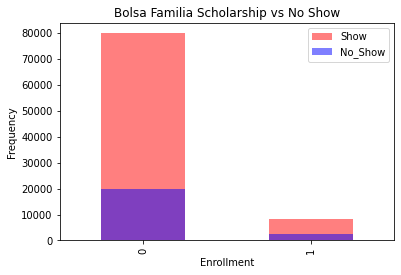

In [15]:
# create mask for show up and no show, as it will be used many times 
Show_Up = df.Show_UP == 1
No_Show = df.Show_UP == 0
# draw bar plot to visualize insights
df.Scholarship[Show_Up].value_counts().plot(kind='bar', alpha=0.5, color='red', label='Show')
df.Scholarship[No_Show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='No_Show')
# set plot title and labels
plt.title('Bolsa Familia Scholarship vs No Show')
plt.xlabel('Enrollment')
plt.ylabel('Frequency')
plt.legend();

#### Plot show that sequence is the same as patients enrolled in Bolsa Familia program or not, it doesn't affect their showed up for appointment.

### Research Question 3 : Does Age affects prevent patients from showing up for their appointment?

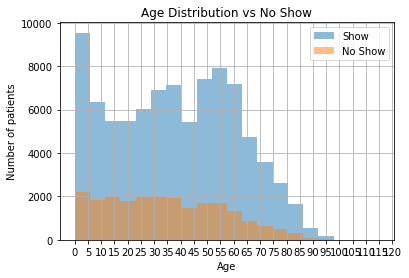

In [16]:
# Draw a histogram to view distribution of age for patients who got appointments(Showed & Non showed)
df.Age[Show_Up].hist(alpha=0.5, bins=20, label='Show')
df.Age[No_Show].hist(alpha=0.5, bins=20, label='No Show')
# set title and labels for plot 
plt.title('Age Distribution vs No Show')
plt.xlabel('Age')
plt.ylabel('Number of patients')
# change xticks interval to 5 for more details
plt.xticks(np.arange(0, 121, 5))
plt.legend();

##### We can see that the relation between the age and No-Show Appointments differs from an age interval to another.
##### Plot view more than one peak.
##### Let's veiw it more clearly by grouping the data by age interval.

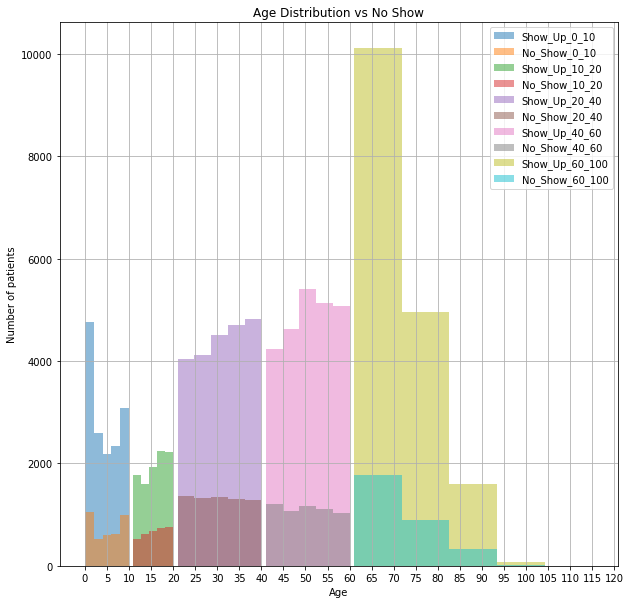

In [17]:
# divide age from 0 to 10, from 10 to 20, and from 20 to 40, and from 40 to 60, and from 60 to 100
Age_0_10 = df.Age <= 10
Age_10_20 = (df.Age > 10) & (df.Age <= 20)
Age_20_40 = (df.Age > 20) & (df.Age <= 40)
Age_40_60 = (df.Age > 40) & (df.Age <= 60)
Age_60_100 = df.Age > 60
# Draw histogram size (10,10) to visualize the age Distribution for each Show_UP
df.Age[Show_Up & Age_0_10].hist(alpha=0.5, bins=5, label='Show_Up_0_10', figsize=(10,10))
df.Age[No_Show & Age_0_10].hist(alpha=0.5, bins=5, label='No_Show_0_10', figsize=(10,10))
df.Age[Show_Up & Age_10_20].hist(alpha=0.5, bins=5, label='Show_Up_10_20', figsize=(10,10))
df.Age[No_Show & Age_10_20].hist(alpha=0.5, bins=5, label='No_Show_10_20', figsize=(10,10))
df.Age[Show_Up & Age_20_40].hist(alpha=0.5, bins=5, label='Show_Up_20_40', figsize=(10,10))
df.Age[No_Show & Age_20_40].hist(alpha=0.5, bins=5, label='No_Show_20_40', figsize=(10,10))
df.Age[Show_Up & Age_40_60].hist(alpha=0.5, bins=5, label='Show_Up_40_60', figsize=(10,10))
df.Age[No_Show & Age_40_60].hist(alpha=0.5, bins=5, label='No_Show_40_60', figsize=(10,10))
df.Age[Show_Up & Age_60_100].hist(alpha=0.5, bins=5, label='Show_Up_60_100', figsize=(10,10))
df.Age[No_Show & Age_60_100].hist(alpha=0.5, bins=5, label='No_Show_60_100', figsize=(10,10))
# set title for plot
plt.title('Age Distribution vs No Show')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.xticks(np.arange(0, 121, 5))
plt.legend();

In [18]:
# calculate the percentage of each age group
a =(df.Age[No_Show & Age_0_10].value_counts().sum() + df.Age[No_Show & Age_10_20].value_counts().sum()) 
b =(df.Age[Show_Up & Age_0_10].value_counts().sum() + df.Age[Show_Up & Age_10_20].value_counts().sum())
c =(df.Age[No_Show & Age_20_40].value_counts().sum() + df.Age[No_Show & Age_40_60].value_counts().sum()) 
d =(df.Age[Show_Up & Age_20_40].value_counts().sum() + df.Age[Show_Up & Age_40_60].value_counts().sum())
e =(df.Age[No_Show & Age_40_60].value_counts().sum() + df.Age[No_Show & Age_60_100].value_counts().sum()) 
f =(df.Age[Show_Up & Age_40_60].value_counts().sum() + df.Age[Show_Up & Age_60_100].value_counts().sum())
no_show_percent_0_20 = a / (a+b) * 100
no_show_percent_20_60 = c / (c+d) * 100
no_show_percent_60_100 = e / (e+f) * 100
print('No Show Percentage 0-20: ', no_show_percent_0_20)
print('No Show Percentage 20-60: ', no_show_percent_20_60)
print('No Show Percentage 60-100: ', no_show_percent_60_100)

No Show Percentage 0-20:  22.28013438412509
No Show Percentage 20-60:  20.73630253241904
No Show Percentage 60-100:  17.248159219950647


### Here is a different conclusion:
##### 1- Positive relation between Age and Attendence, People are more seriousness for their health as they grow up.
##### 2- For patients under 20 years : No-Show is 22.3 %.
##### 3- For patients between 20 and 60 : No-Show is 20.7 %.
##### 4- For patients above 60 years : No-Show is 17.2 %.
#### Perhaps if we got data for jobs we get more clear insights.

### Research Question 4 : Does the location of hospital increase chances of missing appointment for patients?

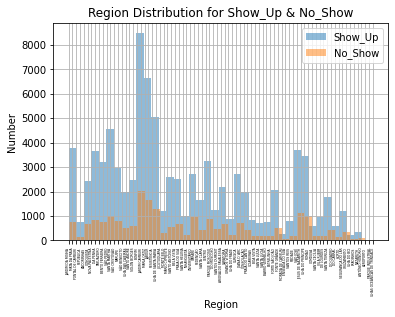

In [19]:
# draw histogram to view relation between neighbourhood and show up 
df.Neighbourhood[Show_Up].hist(alpha=0.5, bins=40, label='Show_Up')
df.Neighbourhood[No_Show].hist(alpha=0.5, bins=40, label='No_Show')
# set title for plot
plt.title('Region Distribution for Show_Up & No_Show')
plt.xlabel('Region')
plt.ylabel('Number')
# set xticks font size
plt.xticks(fontsize=3)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.legend();

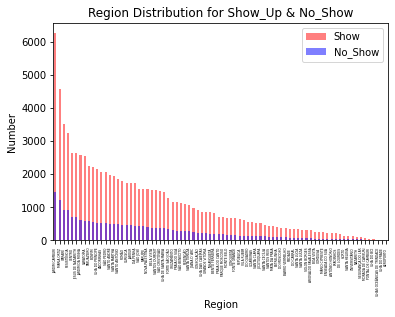

In [20]:
# draw bar plot to view relation between neighbourhood and show up 
df.Neighbourhood[Show_Up].value_counts().plot(kind='bar', alpha=0.5, color='red', label='Show')
df.Neighbourhood[No_Show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='No_Show')
# set title for plot
plt.title('Region Distribution for Show_Up & No_Show')
plt.xlabel('Region')
plt.ylabel('Number')
# set xticks font size
plt.xticks(fontsize=3)
# rotate x-axis labels
plt.xticks(rotation=90)
plt.legend();

#### It seems that more census, more people miss their appointments.

### Research Question 5 : Does patients Show up for their appointment when they carry more than one disease?

In [21]:
# create new column to show if patient have more than one disease, will name it HDA 
# HDA = Hypertension, Diabetes, Alcoholism
df['HDA'] = df['Hypertension'] + df['Diabetes'] + df['Alcoholism']

In [22]:
# create a function to draw histogram for Show Up and No Show
def Histogram(arg1, arg2, arg3, arg4):
    # draw histogram for Show Up and No Show with different attribute
    arg1.hist(bins=10)
    arg2.hist(bins=10)
    # set title and labels for plot
    plt.title(arg3)
    plt.xlabel(arg4)
    plt.ylabel('Frequency')
    # set legend for histogram
    plt.legend(['Show_Up', 'No_Show'])
    # show plot
    plt.show();

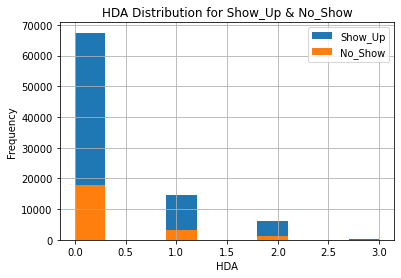

In [23]:
# apply histogram function for HDA 
Histogram(df.HDA[Show_Up], df.HDA[No_Show], 'HDA Distribution for Show_Up & No_Show', 'HDA')

##### There is no special effect, and vision is clear that even if patient have no disease or more than one it doesn't affect their attendence in time.

### Research Question 6 : Does recieving SMS helped more patients attend in time for their appointment?

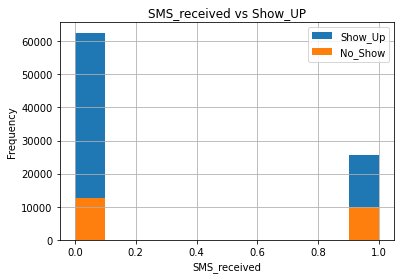

In [25]:
# apply histogram function for SMS_received
Histogram(df.SMS_received[Show_Up], df.SMS_received[No_Show], 'SMS_received vs Show_UP', 'SMS_received')

##### Sorry to tell that it seems sending SMS didn't help much remembering patients to show up for thier appoitments.

### Research Question 7: Does the period between Scheduled day and Appointment day affect patients show up for their Appointment?

In [27]:
# create a new column called waiting_time which is the difference between the AppointmentDay and ScheduledDay
df['waiting_time'] = df['AppointmentDay'] - df['ScheduledDay']

In [28]:
# only keep number of days in the waiting_time column
df['waiting_time'] = df['waiting_time'].dt.days
# convert the waiting_time column to int
df['waiting_time'] = df['waiting_time'].astype(int)

In [29]:
# check the rows where the waiting_time values are negative and replace them with mean of the waiting_time column
df.loc[df['waiting_time'] < 0, 'waiting_time'] = df['waiting_time'].mean()

In [30]:
# devide the waiting_time column into groups of 10 days
df['waiting_time_group'] = pd.cut(df['waiting_time'], 18)

waiting_bins = df.groupby('waiting_time_group')['Show_UP'].value_counts()

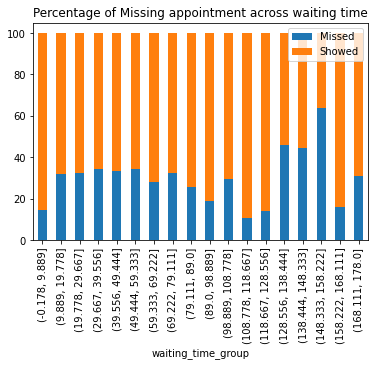

In [31]:
# draw a bar chart to visualize the waiting_time_group
(waiting_bins/waiting_bins.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
# set title for the bar chart, move legend to the upper right
plt.legend(["Missed","Showed"], loc='upper right');
plt.title("Percentage of Missing appointment across waiting time");

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


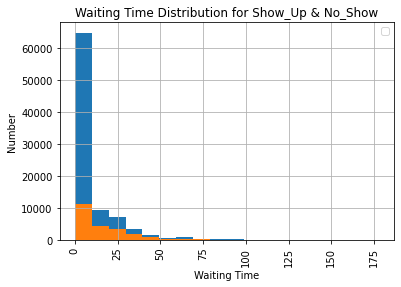

In [32]:
# draw a histogram to visualize the waiting_time_group
df.waiting_time[Show_Up].hist(bins=18)
df.waiting_time[No_Show].hist(bins=18)
# set title for the histogram
plt.title('Waiting Time Distribution for Show_Up & No_Show')
plt.xlabel('Waiting Time')
plt.ylabel('Number')
# set xticks font size, rotate x-axis labels
plt.xticks(rotation=90)
plt.legend();

##### Here we can say that most of patients are registered for their appointments in last 10 days and much of them showed up, so we can suggest make the waiting time didn't exceed 30 days so this may help more patients to show up for their appointment.

<a id='conclusions'></a>
## Conclusions

#### 1- The data set is almost clean as there were no null nor duplicate values, even some columns renamed correctly.
#### 2- Dates columns should be in date format, thats already fixed.
#### 3- The last column encoding causes confusion, it was necessary to fix it for more consistancy.
#### 4- Most Attributes doesn't affect patients showing up for their appointments.
#### 5-a- We suggest collecting more specific data about patients to answer main question clearly.
#### 5-b- may be (having job or not, time of SMS, type of transportation used)